In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy as sp
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, log_loss
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GroupKFold, RepeatedKFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

SEED = 4321
np.random.seed(SEED)

In [4]:
#Models

from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Keras
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.preprocessing import text, sequence
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


### Data

In [5]:
#Data

#X = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\X_1.feather')
#test = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\test_1.feather')

X = pd.read_csv(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\train_csv.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\test_csv.csv')

#smaller data
#X_old = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\train_small_dummies.feather')
#test_old = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\test_small_dummies.feather')


#X = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\X_1.feather')
#test = pd.read_feather(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\feathers\test_1.feather')


y_df = pd.read_csv( r"C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\Data\train_labels.csv")
y = y_df['damage_grade']

test_orig = pd.read_csv(r"C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\Data\test_values.csv")

print(X.shape, test.shape, y.shape)

(10000, 64) (10000, 64) (10000,)


In [86]:
X.head(50).transpose()

0          1         2   \
geo_level_1_id                           3.099571   2.877243  4.159145   
geo_level_2_id                          24.133623  19.189912  7.554631   
age                                      4.052204   3.334962  3.731134   
area                                     2.715460   2.622315  2.779238   
height                                   1.897538   2.153435  1.228172   
has_superstructure_mud_mortar_stone      1.000000   1.000000  1.000000   
has_superstructure_cement_mortar_brick   0.000000   0.000000  0.000000   
has_superstructure_timber                0.000000   0.000000  0.000000   
has_secondary_use                        0.000000   0.000000  8.998412   
count_floors_pre_eq_1                    0.000000   0.000000  1.000000   
count_floors_pre_eq_2                    1.000000   0.000000  0.000000   
count_floors_pre_eq_3                    0.000000   1.000000  0.000000   
count_floors_pre_eq_4                    0.000000   0.000000  0.000000   
count_floors_pre_eq_5                    0.000000   0.000000  0.000000   
count_floors_pre_eq_6                    0.000000   0.000000  0.000000   
count_floors_pre_eq_7                    0.000000   0.000000  0.000000   
count_floors_pre_eq_9                    0.000000   0.000000  0.000000   
land_surface_condition_1                 0.000000   0.000000  0.000000   
land_surface_condition_2                 0.000000   0.000000  0.000000   
land_surface_condition_3                 1.000000   1.000000  1.000000   
foundation_type_1                        1.000000   1.000000  1.000000   
foundation_type_2                        0.000000   0.000000  0.000000   
foundation_type_3                        0.000000   0.000000  0.000000   
foundation_type_4                        0.000000   0.000000  0.000000   
foundation_type_5                        0.000000   0.000000  0.000000   
roof_type_1                              0.000000   0.000000  0.000000   
roof_type_2                              1.000000   1.000000  1.000000   
roof_type_3                              0.000000   0.000000  0.000000   
ground_floor_type_1                      0.000000   0.000000  1.000000   
ground_floor_type_2                      1.000000   1.000000  0.000000   
...                                           ...        ...       ...   
ground_floor_type_5                      0.000000   0.000000  0.000000   
other_floor_type_1                       0.000000   0.000000  1.000000   
other_floor_type_2                       0.000000   0.000000  0.000000   
other_floor_type_3                       0.000000   0.000000  0.000000   
other_floor_type_4                       1.000000   1.000000  0.000000   
position_1                               0.000000   0.000000  0.000000   
position_2                               1.000000   1.000000  0.000000   
position_3                               0.000000   0.000000  0.000000   
position_4                               0.000000   0.000000  1.000000   
plan_configuration_1                     0.000000   0.000000  0.000000   
plan_configuration_2                     0.000000   0.000000  0.000000   
plan_configuration_3                     0.000000   0.000000  0.000000   
plan_configuration_4                     0.000000   0.000000  0.000000   
plan_configuration_5                     0.000000   0.000000  0.000000   
plan_configuration_6                     0.000000   0.000000  1.000000   
plan_configuration_7                     1.000000   1.000000  0.000000   
plan_configuration_8                     0.000000   0.000000  0.000000   
plan_configuration_9                     0.000000   0.000000  0.000000   
legal_ownership_status_1                 0.000000   0.000000  0.000000   
legal_ownership_status_2                 0.000000   0.000000  0.000000   
legal_ownership_status_3                 1.000000   1.000000  1.000000   
legal_ownership_status_4                 0.000000   0.000000  0.000000   
count_families_0.0                       0.000000  

# Data Reduction

In [7]:
#drop level 1
X = X.drop(['building_id', 'geo_level_3_id'], axis = 1)

In [8]:
test = test.drop(['building_id', 'geo_level_3_id'], axis = 1)

In [9]:
test.shape

(10000, 62)

In [10]:
X.head()

geo_level_1_id  geo_level_2_id       age      area    height  \
0        3.099571       24.133623  4.052204  2.715460  1.897538   
1        2.877243       19.189912  3.334962  2.622315  2.153435   
2        4.159145        7.554631  3.731134  2.779238  1.228172   
3        3.099571       11.054557  2.016419  2.363217  1.596741   
4        5.286782       21.538664  0.000000  2.808281  2.377167   

   has_superstructure_mud_mortar_stone  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    1   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                     0.0                        0.0   
1                                     0.0                        0.0   
2                                     0.0                        0.0   
3                                     0.0                        0.0   
4                                     0.0                        0.0   

   has_secondary_use  count_floors_pre_eq_1         ...          \
0           0.000000                      0         ...           
1           0.000000                      0         ...           
2           8.998412                      1         ...           
3           0.000000                      0         ...           
4           0.000000                      0         ...           

   legal_ownership_status_3  legal_ownership_status_4  count_families_0.0  \
0                         1                         0                   0   
1                         1                         0                   1   
2                         1                         0                   0   
3                         1                         0                   0   
4                         1                         0                   0   

   count_families_1.0  count_families_2.0  count_families_3.0  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   count_families_4.0  count_families_5.0  count_families_6.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   count_families_7.0  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 62 columns]

X = X.drop([ 'has_secondary_use_use_police', 'has_secondary_use_gov_office', 'has_secondary_use_health_post',
                                'has_secondary_use_school', 'has_secondary_use_institution', 'has_secondary_use_industry',
                                'has_secondary_use_other', 'has_secondary_use_rental', 'has_superstructure_rc_engineered',
                                'has_superstructure_other', 'has_superstructure_cement_mortar_stone', 'has_superstructure_stone_flag',
                                'has_secondary_use_hotel', 'has_superstructure_rc_non_engineered', 'has_secondary_use_agriculture',
                                'has_superstructure_mud_mortar_brick', 'has_superstructure_bamboo', 'has_superstructure_adobe_mud',
                                ], axis=1) #'geo_level_2_id', 'geo_level_3_id'

#Predictions only
X = X[['gbc1', 'catz1', 'rfc1', 'xgb21', 'lgb21', 'abc_2', 'log2', 'rfc_2', 'xgb_2', 'bag2_2', 'lgb2_2']]
X.head()

#Predictions only
test = test[['gbc1', 'catz1', 'rfc1', 'xgb21', 'lgb21', 'abc_2', 'log2', 'rfc_2', 'xgb_2', 'bag2_2']]
test.head()

#PRedictions only
X = X[['log2', 'rfc_2', 'xgb_2',  'lgb2_2']]  #'abc_2', 'bag2_2',
X.head()

#PRedictions only
test = test[['log2', 'rfc_2', 'xgb_2',  'lgb2_2']]  #'abc_2', 'bag2_2',
test.head()

X['bago'] = X_old['bag1']
X['lgbo'] = X_old['lgb1']
X['xgbo'] = X_old['xgb1']
X['rfco'] = X_old['rfc1']
X['cato'] = X_old['cat1']
X['catbo'] = X_old['catb1']
X['gbco'] = X_old['gbc1']
X.head()

test['bago'] = test_old['bag1']
test['lgbo'] = test_old['lgb1']
test['xgbo'] = test_old['xgb1']
test['rfco'] = test_old['rfc1']
test['cato'] = test_old['cat1']
test['catbo'] = test_old['catb1']
test['gbco'] = test_old['gbc1']
test.head()

X_old.head()

### F1 50/50

In [11]:
#level 1 50/50 split
from sklearn.model_selection import train_test_split

X_half, X_valh, y_half, y_valh = train_test_split(X, y, test_size=0.6, random_state=SEED)
X_half.shape

(4000, 62)

In [12]:
#Split Data

X_train = X[:7000]
X_val   = X[7000:]
print(X_train.shape, X_val.shape)

y_train = y[:7000]
y_val  = y[7000:]
print(y_train.shape, y_val.shape)

(7000, 62) (3000, 62)
(7000,) (3000,)


### CV

In [13]:
n_folds = 5

def f1_cv(model, X,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    f1 =  cross_val_score(model, X.values, y, scoring="f1_micro", cv = kf, verbose = 2)
    return(f1)

### Models

#Keras
 
def keras_build():
    #model = Sequential()
    model = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
    model.Dense(50, activation="relu")
    model.Dropout(0.1)
    model.Dense(6, activation="sigmoid")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ker_m = KerasClassifier(build_fn=keras_build, epochs=200, batch_size=5, verbose=0)

In [537]:


xgb_m = XGBClassifier(n_estimators=1800, #1800
                        max_depth=7, # 7
                        objective="multi:softmax",  #binary:logistic
                        num_class = 3,
                        learning_rate=.02, #.02
                        subsample=.7,        #0.7
                        colsample_bytree=.3, #0.3
                        gamma=1.5, #1.5
                        #reg_alpha=0,
                        #reg_lambda=1,
                        nthread=2)




catc_m = CatBoostClassifier(learning_rate=0.05, #.05
                            depth=6, 
                            l2_leaf_reg = 14, 
                            iterations = 1650, #650
                            verbose = False,
                            loss_function='MultiClassOneVsAll',
                            random_seed=SEED,
                            thread_count = 2,
                            )

knn_m = KNeighborsClassifier(algorithm='auto', 
                         n_neighbors = 1000
                        )





catd_m = CatBoostClassifier(random_seed = SEED,
                           leaf_estimation_method ='Newton',
                           learning_rate=0.057, 
                           l2_leaf_reg = 23, 
                           depth=6, 
                           od_pval=0.0000001, 
                           iterations = 877, 
                           loss_function='Logloss')



gbc_m = GradientBoostingClassifier(learning_rate =0.06,  #.06
                                   n_estimators = 550,#550
                                   max_depth = 5, #5
                                   max_features = 0.65, #0.65
                                   min_samples_leaf = 1, #1                                  
                                   random_state = SEED
                                  )


catz_m = CatBoostClassifier(iterations=1186,   #504, 1186
                           learning_rate=0.06, #.07, .06
                           depth=8, #8
                           l2_leaf_reg = 1,  #1
                           eval_metric = 'TotalF1', #MultiClass
                           loss_function='MultiClass', #'MultiClass'
                           classes_count=4,
                           #rsm = 0.99,
                           #random_strength = 0.5,
                           #bagging_temperature = 0.5,
                           thread_count = 1,
                           random_seed=SEED,
                           verbose = False)



lgb_m = lgb.LGBMClassifier(max_depth=4, 
                           metric="f1", 
                           n_estimators=900, #800
                           num_leaves=10,  #10
                           boosting_type="gbdt", 
                           learning_rate=0.05, #.05 
                           feature_fraction=0.45,  #0.45
                           #max_bin = 200,  #600
                           #colsample_bytree=0.45,
                           #bagging_fraction=0.8,
                           #bagging_freq=5, 
                           reg_lambda=0.2)



etc_m = ExtraTreesClassifier(n_estimators = 800,
                             max_features = .4, 
                             max_depth = 15, 
                             min_samples_split = 2,
                             #criterion = 'entropy',
                             random_state=SEED)

base = LogisticRegression()
#base = ExtraTreesClassifier()
bag_m = BaggingClassifier(n_jobs=-1,
                         base_estimator=base,
                          n_estimators=30, #30
                          #max_features = 0.9, #0.6
                          #max_samples = 0.9,
                          bootstrap = True,
                          #bootstrap_features = True,
                          random_state=SEED
                         )
baseA = LogisticRegression()
#baseA = ExtraTreesClassifier()
#baseA = RandomForestClassifier()
abc_m = AdaBoostClassifier(base_estimator=baseA,
                           n_estimators = 1000,  #1000
                           learning_rate =0.025,  #.025
                           random_state = SEED                           
                          )


rfc_m = RandomForestClassifier(n_estimators=800, #800
                               criterion = 'entropy', #entropy
                               max_features = 0.5, #0.5
                               max_depth = 25,  #25
                               min_samples_split = 5,  # 5
                               min_samples_leaf = 2,  #2                             
                               max_leaf_nodes=253,  #253
                               bootstrap = True,  #True
                               random_state=SEED)
rfc_test_m = RandomForestClassifier(n_estimators=800, #800
                               criterion = 'entropy', #entropy
                               max_features = 0.5, #0.5
                               max_depth = 25,  #25
                               min_samples_split = 5,  # 5
                               min_samples_leaf = 2,  #2                             
                               max_leaf_nodes=253,  #253
                               bootstrap = True,  #True
                               random_state=SEED)


lgb2_m = lgb.LGBMClassifier(max_depth=2, #2
                           metric='multi_error',    #auc
                           n_estimators=2510, #2115/2510
                           num_leaves=3,  #3
                           boosting_type= 'gbdt', # "gbdt"
                           #xgboost_dart_mode = True,
                           learning_rate=0.017, #.023/ .017
                           feature_fraction=0.16,  #0.34
                           application = 'multiclass',
                           #classes = 3,
                           #max_bin = 200,  #255
                           #colsample_bytree=0.001, #.45
                           #bagging_fraction=0.95,
                           #bagging_freq=50, 
                           reg_alpha = 2, #2
                           reg_lambda=2, #2
                           min_data_in_leaf = 53, #25
                           min_sum_hessian_in_leaf = 10, #.7
                           seed = SEED)

xgb_m = XGBClassifier(n_estimators=1370, #1750
                        max_depth=6, # 7
                        objective="multi:softmax",  #binary:logistic
                        num_class = 3,
                        learning_rate=.017, #.02/ .17
                        subsample=.6,        #0.7
                        colsample_bytree=.3, #0.3
                        gamma=10, #10
                        min_child_weight = 2.4, #2.4
                        #reg_alpha=0.01,
                        reg_lambda=1.2,  #1.2
                        #max_delta_step = 3,
                        nthread=2)



rid_m = RidgeClassifier( alpha = 7.2,  #7.2
                         #fit_intercept = True,
                         #normalize = True,
                         #max_iter = 1,
                         #tol = .0005,
                         #solver = 'sag',
                         random_state = SEED                         
                       )



bnb_m = BernoulliNB( alpha = 5.5, #5
                     #binarize = 1,
                   )


base = LogisticRegression()
#base = ExtraTreesClassifier()
bag_m = BaggingClassifier(n_jobs=-1,
                          base_estimator=base,
                          n_estimators=68, #68
                          #max_features = 0.9, #0.6
                          #max_samples = 0.9,
                          bootstrap = True,
                          #bootstrap_features = True,
                          random_state=SEED
                         )


svc_m = LinearSVC( random_state = SEED,
                   penalty = 'l2',
                   #loss = 'hinge', 
                   dual = False,
                   tol = .00012, #.00012
                   #C = 1, 
                   fit_intercept = True,
                   intercept_scaling = 1.01, #1.01
                   max_iter = 50, #50
                   )

xgb2_m = XGBClassifier(n_estimators=1870, #1870
                        max_depth=7, # 7
                        objective="multi:softmax",  #binary:logistic
                        num_class = 3,
                        learning_rate=.015, #.015
                        #subsample=.7,        #0.7
                        #colsample_bytree=.3, #0.3
                        gamma=1.5, #1.5                        
                        #reg_alpha=0,
                        #reg_lambda=1,
                        nthread=3)

cat_m = CatBoostClassifier(iterations=1947, 
                           learning_rate=0.05,  #.05
                           depth=5,
                           #l2_leaf_reg = 1,
                           eval_metric = 'MultiClass',
                           loss_function='MultiClass', 
                           random_seed=4321,
                           verbose = False)

lgb3_m = lgb.LGBMClassifier(max_depth=2, #2
                           metric='multi_error',    #auc
                           n_estimators=3510, #2115/2510
                           num_leaves=3,  #3
                           boosting_type= 'gbdt', # "gbdt"
                           #xgboost_dart_mode = True,
                           learning_rate=0.015, #.023/ .015
                           #feature_fraction=0.90,  #0.34
                           application = 'multiclass',
                           #classes = 3,
                           #max_bin = 500,  #255
                           #colsample_bytree=0.001, #.45
                           #bagging_fraction=0.95,
                           #bagging_freq=50, 
                           #reg_alpha = 2, #2
                           #reg_lambda=2, #2
                           min_data_in_leaf = 35, #25/40
                           min_sum_hessian_in_leaf = 10, #.7/ 10
                           seed = SEED)

mlp_m = MLPClassifier(hidden_layer_sizes = (400,50,400),  #400,50,400
                      activation = 'logistic',  #logistic
                      solver = 'adam', # adam
                      alpha = .0001, #  .0001
                      batch_size = 250,  #250
                      #learning_rate = 'invscaling',
                      learning_rate_init = .001,  #.001
                      #power_t = 0.5,
                      max_iter = 400,   
                      early_stopping = True,
                      tol = .0001,
                      #beta_1 = 0.1,
                      #beta_2 = 0.9,
                      random_state = SEED)

lda_m = make_pipeline(RobustScaler(),LinearDiscriminantAnalysis())

lcv_m = LogisticRegressionCV(random_state = SEED,
                           penalty = 'l2',   #l2
                           tol = .00005,  #.00005
                           #C = 0.65, #0.65 submission/1
                           #fit_intercept = True, #False
                           #intercept_scaling = 1,  #1
                           solver = 'newton-cg', # newton-cg
                           multi_class = 'multinomial',  # multinomial
                           max_iter = 57  #57 submission/47
                            )

rcv_m = RidgeClassifierCV()

log_m = LogisticRegression(
                           random_state = SEED,
                           penalty = 'l2',   #l2
                           tol = .00005,  #.00005
                           C = .65, #0.65 submission/1
                           #fit_intercept = True, #False
                           #intercept_scaling = 1,  #1
                           solver = 'newton-cg', # newton-cg
                           multi_class = 'multinomial',  # multinomial
                           max_iter = 57,  #57 submission/47
                           )

pip_m = make_pipeline(RobustScaler(), log_m)

In [15]:
rfc_m.fit(X_train, y_train)
rfc_prediction = rfc_m.predict(X_val)
print(f1_score(y_val, rfc_prediction, average = 'micro'))  #6893

0.6756666666666666


FEature importance

In [16]:
rfc_m.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=25, max_features=0.5, max_leaf_nodes=253,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=4321, verbose=0,
            warm_start=False)

In [17]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize = (12,12), legend = False)

In [18]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [19]:
fi = rf_feat_importance(rfc_m, X)

In [20]:
small_cols = fi.cols[fi.imp > .05]
print(small_cols)

0        geo_level_1_id
1        geo_level_2_id
20    foundation_type_1
3                  area
2                   age
Name: cols, dtype: object


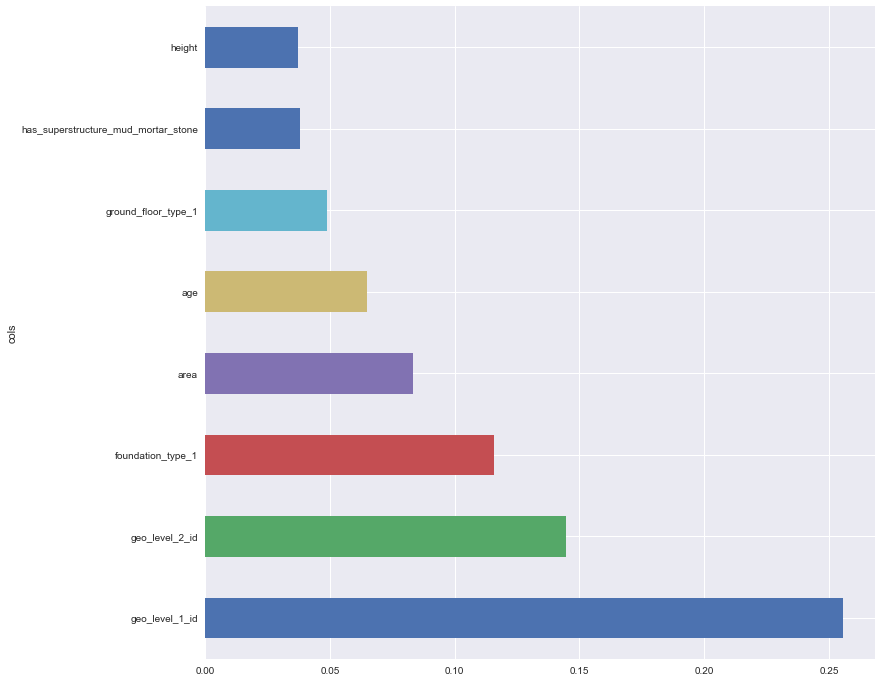

In [21]:
plot_fi(fi[:8])

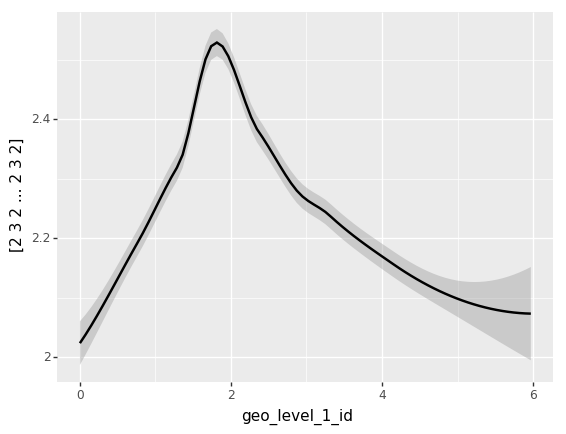

<ggplot: (-9223372036826093536)>

In [22]:
from pdpbox import pdp
from plotnine import *

ggplot(X, aes('geo_level_1_id', y_df['damage_grade'].values))+stat_smooth(se=True, method='loess')

In [23]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

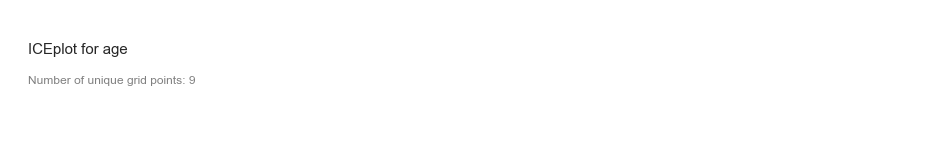

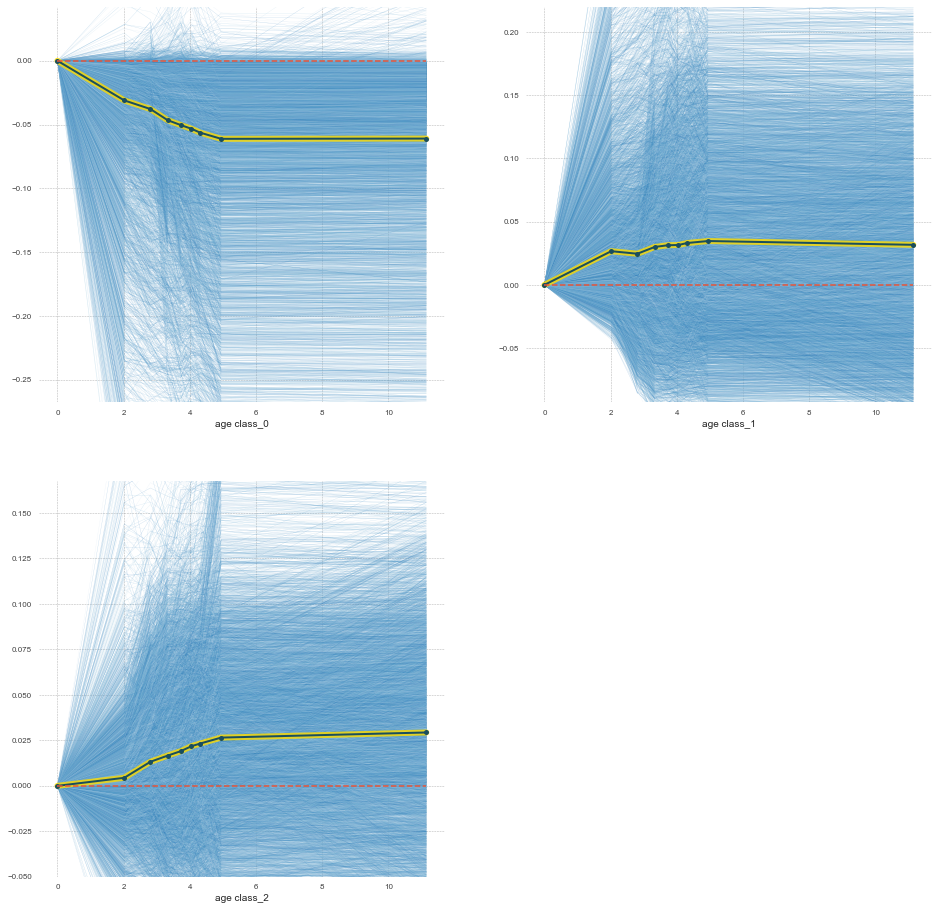

In [535]:
m = rfc_m
x = X
plot_pdp('age')

In [542]:
old_age = pd.read_csv(r'C:\Users\user\Desktop\Microsoft Cert\CAPSTONE\Data\train_values.csv')
X_old = X.copy()
X_old['age_old'] = old_age['age']
X_old.drop(['age'], axis = 1)


geo_level_1_id  geo_level_2_id      area    height  \
0           3.099571       24.133623  2.715460  1.897538   
1           2.877243       19.189912  2.622315  2.153435   
2           4.159145        7.554631  2.779238  1.228172   
3           3.099571       11.054557  2.363217  1.596741   
4           5.286782       21.538664  2.808281  2.377167   
5           1.299099        5.904224  2.533305  0.743310   
6           4.006474       24.714158  2.533305  1.897538   
7           1.299099        8.843840  2.426087  1.897538   
8           1.299099       12.153760  2.642361  1.596741   
9           3.845933        6.552216  2.942742  2.153435   
10          5.178067       30.822818  3.178891  2.153435   
11          5.065976       13.556900  2.732188  1.897538   
12          0.000000       17.028144  2.748373  2.377167   
13          0.000000       23.241105  2.808281  2.576607   
14          1.299099        5.904224  2.622315  2.756985   
15          1.715343       18.530544  2.808281  2.377167   
16          0.769676        6.040466  2.210786  1.897538   
17          0.000000        8.926851  2.808281  1.897538   
18          0.000000       13.966399  2.642361  1.897538   
19          5.594915       26.374973  2.748373  2.377167   
20          2.877243       25.904582  2.622315  0.743310   
21          1.715343       16.233322  2.661649  1.897538   
22          0.000000       25.992690  2.764047  2.153435   
23          0.000000       24.503755  2.822180  2.153435   
24          2.365823       13.128938  3.259547  2.576607   
25          0.000000       16.551045  3.038642  2.921967   
26          1.715343       13.463468  2.886253  2.377167   
27          1.299099       18.232618  2.698154  2.153435   
28          3.496746       18.850205  2.661649  1.596741   
29          3.496746       28.028689  2.973647  1.596741   
30          1.299099       15.492511  2.601455  2.153435   
31          3.845933        4.463300  3.349182  2.921967   
32          2.365823       21.302081  2.579716  2.377167   
33          2.634420        0.789737  3.117888  1.596741   
34          3.305151        3.626280  2.601455  2.153435   
35          4.444228       11.989447  2.622315  2.153435   
36          0.769676       22.203332  2.363217  0.743310   
37          0.000000       16.551045  2.920948  2.377167   
38          2.365823       22.180916  2.680231  2.377167   
39          4.159145       26.849401  2.732188  2.153435   
40          1.299099        9.557268  2.363217  2.153435   
41          0.000000        7.853955  2.454979  2.153435   
42          4.444228       16.375651  2.848840  2.153435   
43          2.063616       15.794943  2.680231  1.897538   
44          2.365823       13.649422  2.835693  2.153435   
45          0.000000        3.125755  2.680231  2.377167   
46          2.877243       21.109898  2.622315  1.897538   
47          0.000000        7.346468  2.748373  2.153435   
48          3.845933        1.809351  3.080000  3.215775   
49          2.063616       26.443560  2.579716  1.897538   
50          3.845933        4.269932  2.680231  3.074225   
51          3.845933        4.463300  3.132188  2.576607   
52          4.577985       14.571139  2.698154  1.596741   
53          3.099571       16.410951  2.622315  2.153435   
54          4.006474       11.878134  3.063906  2.153435   
55          2.063616       14.696099  2.680231  1.596741   
56          0.769676       10.205920  2.848840  2.921967   
57          2.634420       26.832681  2.661649  2.153435   
58          3.676459        5.764188  3.002629  2.576607   
59          2.365823       23.157327  2.579716  2.153435   
60          2.634420       12.044567  2.363217  1.596741   
61          1.299099       20.210250  2.395560  1.596741   
62          4.706616       31.010425  3.299632  2.153435   
63          2.063616       21.158192  2.898102  2.377167   
64          3.099571       11.054557  2.395560  1.596741   
65          0.769676        7.239561  2.698154

In [546]:
indetest = X_old[X_old.age_old >110 ].index   #100
print(indetest.shape)  #test = 64, X = 40
X_old['age_old'][indetest] = 65

(0,)


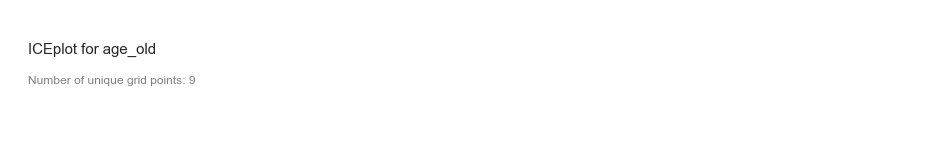

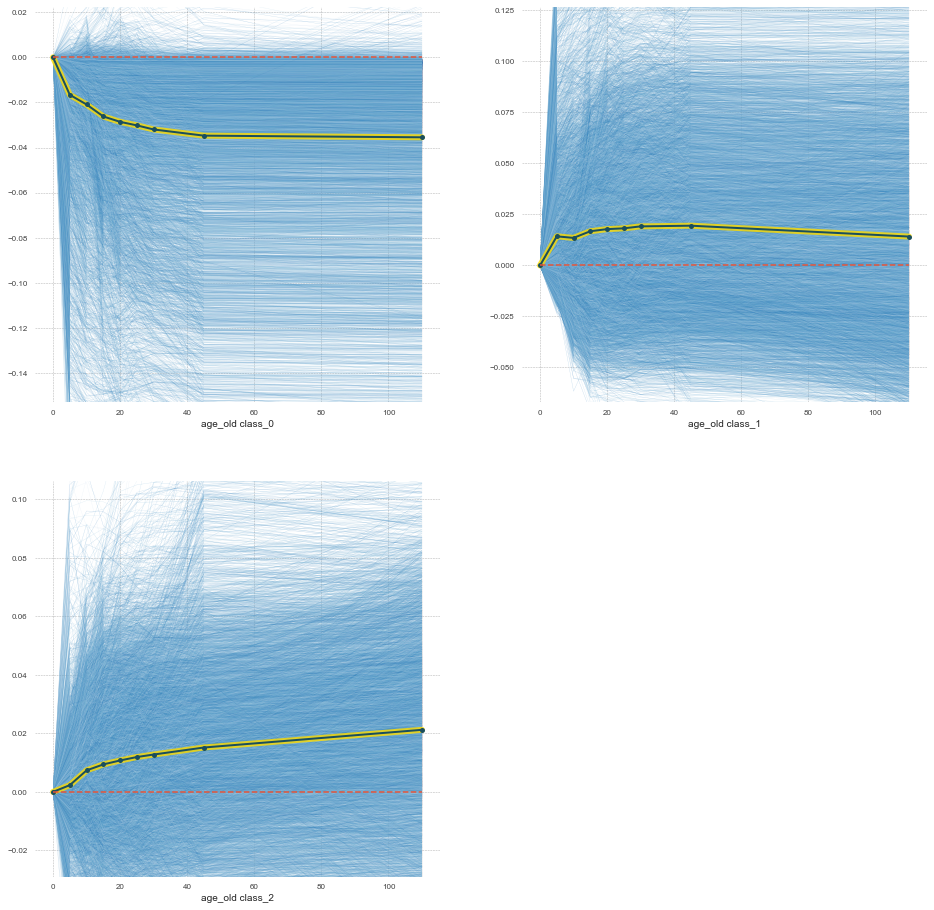

In [547]:
rfc_test_m.fit(X_old, y)
m = rfc_test_m

x = X_old
plot_pdp('age_old')

In [25]:
from treeinterpreter import treeinterpreter as ti

In [230]:
#rfc_m.fit(X_pred1, y)
rfc_pred = rfc_m.predict(test)

In [529]:
pd.set_option('display.max_rows', 500)
test.head(10).transpose()

0          1          2  \
geo_level_1_id                          0.769676   2.063616   3.496746   
geo_level_2_id                          8.139417  17.357198  21.085688   
age                                     0.000000   3.334962   2.811417   
area                                    2.533305   2.426087   2.642361   
height                                  1.897538   1.596741   1.596741   
has_superstructure_mud_mortar_stone     0.000000   1.000000   1.000000   
has_superstructure_cement_mortar_brick  9.643317   0.000000   0.000000   
has_superstructure_timber               0.000000   0.000000   0.899384   
has_secondary_use                       0.000000   0.000000   0.000000   
count_floors_pre_eq_1                   0.000000   0.000000   0.000000   
count_floors_pre_eq_2                   1.000000   1.000000   1.000000   
count_floors_pre_eq_3                   0.000000   0.000000   0.000000   
count_floors_pre_eq_4                   0.000000   0.000000   0.000000   
count_floors_pre_eq_5                   0.000000   0.000000   0.000000   
count_floors_pre_eq_6                   0.000000   0.000000   0.000000   
count_floors_pre_eq_7                   0.000000   0.000000   0.000000   
count_floors_pre_eq_9                   0.000000   0.000000   0.000000   
land_surface_condition_1                0.000000   0.000000   0.000000   
land_surface_condition_2                0.000000   0.000000   0.000000   
land_surface_condition_3                1.000000   1.000000   1.000000   
foundation_type_1                       0.000000   1.000000   1.000000   
foundation_type_2                       0.000000   0.000000   0.000000   
foundation_type_3                       1.000000   0.000000   0.000000   
foundation_type_4                       0.000000   0.000000   0.000000   
foundation_type_5                       0.000000   0.000000   0.000000   
roof_type_1                             0.000000   0.000000   0.000000   
roof_type_2                             1.000000   1.000000   1.000000   
roof_type_3                             0.000000   0.000000   0.000000   
ground_floor_type_1                     0.000000   0.000000   0.000000   
ground_floor_type_2                     1.000000   1.000000   0.000000   
ground_floor_type_3                     0.000000   0.000000   1.000000   
ground_floor_type_4                     0.000000   0.000000   0.000000   
ground_floor_type_5                     0.000000   0.000000   0.000000   
other_floor_type_1                      0.000000   0.000000   0.000000   
other_floor_type_2                      0.000000   0.000000   0.000000   
other_floor_type_3                      0.000000   0.000000   0.000000   
other_floor_type_4                      1.000000   1.000000   1.000000   
position_1                              0.000000   0.000000   0.000000   
position_2                              1.000000   1.000000   1.000000   
position_3                              0.000000   0.000000   0.000000   
position_4                              0.000000   0.000000   0.000000   
plan_configuration_1                    0.000000   0.000000   0.000000   
plan_configuration_2                    0.000000   0.000000   0.000000   
plan_configuration_3                    0.000000   0.000000   0.000000   
plan_configuration_4                    0.000000   0.000000   0.000000   
plan_configuration_5                    0.000000   0.000000   0.000000   
plan_configuration_6                    0.000000   0.000000   0.000000   
plan_configuration_7                    1.000000   1.000000   1.000000   
plan_configuration_8                    0.000000   0.000000   0.000000   
plan_configuration_9                    0.000000   0.000000   0.000000   
legal_ownership_status_1                0.000000   0.000000   0.000000   
legal_ownership_status_2                0.000000   0.000000   0.000000   
legal_ownership_status_3                1.000000   1.000000   1.000000   
legal_ownership_status_4                0.000000   

In [527]:
test_orig.head(10).transpose()

0      1     2      3     4  \
building_id                             11456  16528  3253  18614  1544   
geo_level_1_id                              1      4    10      0     5   
geo_level_2_id                             42    227   361    275   370   
geo_level_3_id                            941   1857  4646   3537  2025   
count_floors_pre_eq                         2      2     2      2     3   
age                                         0     15    10     10    25   
area                                       24     20    29     37    35   
height                                      4      3     3      6     5   
land_surface_condition                   d502   d502  d502   d502  d502   
foundation_type                          6c3e   337f  337f   337f  337f   
roof_type                                7e76   7e76  7e76   7e76  7e76   
ground_floor_type                        b1b4   b1b4  b440   b1b4  b1b4   
other_floor_type                         f962   f962  f962   f962  f962   
position                                 3356   3356  3356   bfba  3356   
plan_configuration                       a779   a779  a779   a779  a779   
has_superstructure_adobe_mud                0      0     0      0     0   
has_superstructure_mud_mortar_stone         0      1     1      1     1   
has_superstructure_stone_flag               0      0     0      0     0   
has_superstructure_cement_mortar_stone      0      0     0      0     0   
has_superstructure_mud_mortar_brick         0      0     0      0     0   
has_superstructure_cement_mortar_brick      1      0     0      0     0   
has_superstructure_timber                   0      0     1      0     0   
has_superstructure_bamboo                   0      0     1      0     0   
has_superstructure_rc_non_engineered        0      0     0      0     0   
has_superstructure_rc_engineered            0      0     0      0     0   
has_superstructure_other                    0      0     0      0     0   
legal_ownership_status                   c8e1   c8e1  c8e1   c8e1  c8e1   
count_families                              1      1     1      0     1   
has_secondary_use                           0      0     0      0     0   
has_secondary_use_agriculture               0      0     0      0     0   
has_secondary_use_hotel                     0      0     0      0     0   
has_secondary_use_rental                    0      0     0      0     0   
has_secondary_use_institution               0      0     0      0     0   
has_secondary_use_school                    0      0     0      0     0   
has_secondary_use_industry                  0      0     0      0     0   
has_secondary_use_health_post               0      0     0      0     0   
has_secondary_use_gov_office                0      0     0      0     0   
has_secondary_use_use_police                0      0     0      0     0   
has_secondary_use_other                     0      0     0      0     0   

                                            5      6      7     8     9  
building_id                             12568  15497  13987  9598  6668  
geo_level_1_id                              1      6     26     0     5  
geo_level_2_id                              0      1    643   682   158  
geo_level_3_id                              1    172   2173  8126   983  
count_floors_pre_eq                         2      2      3     2     2  
age                                         5      5     30    25     5  
area                                      112     33     63    23    38  
height                                      5      4      6     4     4  
land_surface_condition                   d502   2f15   d502  d502  2f15  
foundation_type                          467b   858b   337f  858b  337f  
roof_type                                67f9   7e76   7e76  7e76  7e76  
ground_floor_type                        467b   b1b4   b1b4  b1b4  b1b4  
other_floor_type                         67f9   f962   9eb0  f962  f962  
positio

In [329]:
sub_1 = pd.DataFrame()
sub_1['Id'] = test_orig['building_id']
sub_1['damage_grade'] = rfc_pred.astype(np.int64)
sub_1.head(50).transpose()

0      1     2      3     4      5      6      7     8   \
Id            11456  16528  3253  18614  1544  12568  15497  13987  9598   
damage_grade      1      2     2      2     3      1      2      2     2   

                9   ...      40     41   42    43    44    45    46    47  \
Id            6668  ...    4908  19728  644  6096  7484  8829  6052  4218   
damage_grade     2  ...       2      2    2     3     2     1     2     1   

                 48     49  
Id            11823  19005  
damage_grade      3      2  

[2 rows x 50 columns]

y_df.head(50).transpose()

In [530]:
row_num = 9    #Modify this to see other structures
row = test.values[None, row_num]
print(test_orig['building_id'].values[None,row_num])

[6668]


In [531]:
prediction, bias, contributions = ti.predict(rfc_m, row)
contributions = [contributions[0][i][0] for i in range(len(contributions[0]))]
colnames = test.columns.values

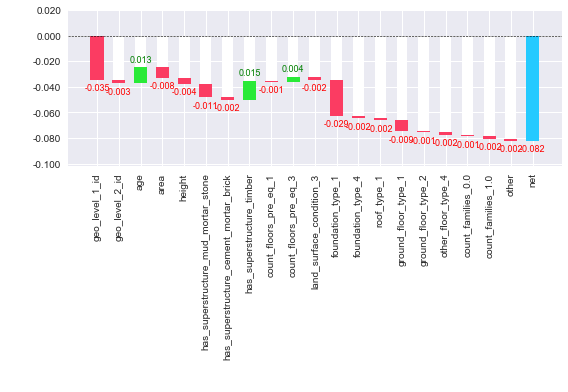

In [533]:
import waterfall_chart
my_plot=waterfall_chart.plot(colnames,contributions, rotation_value=90, threshold=0.02,formatting='{:,.3f}')

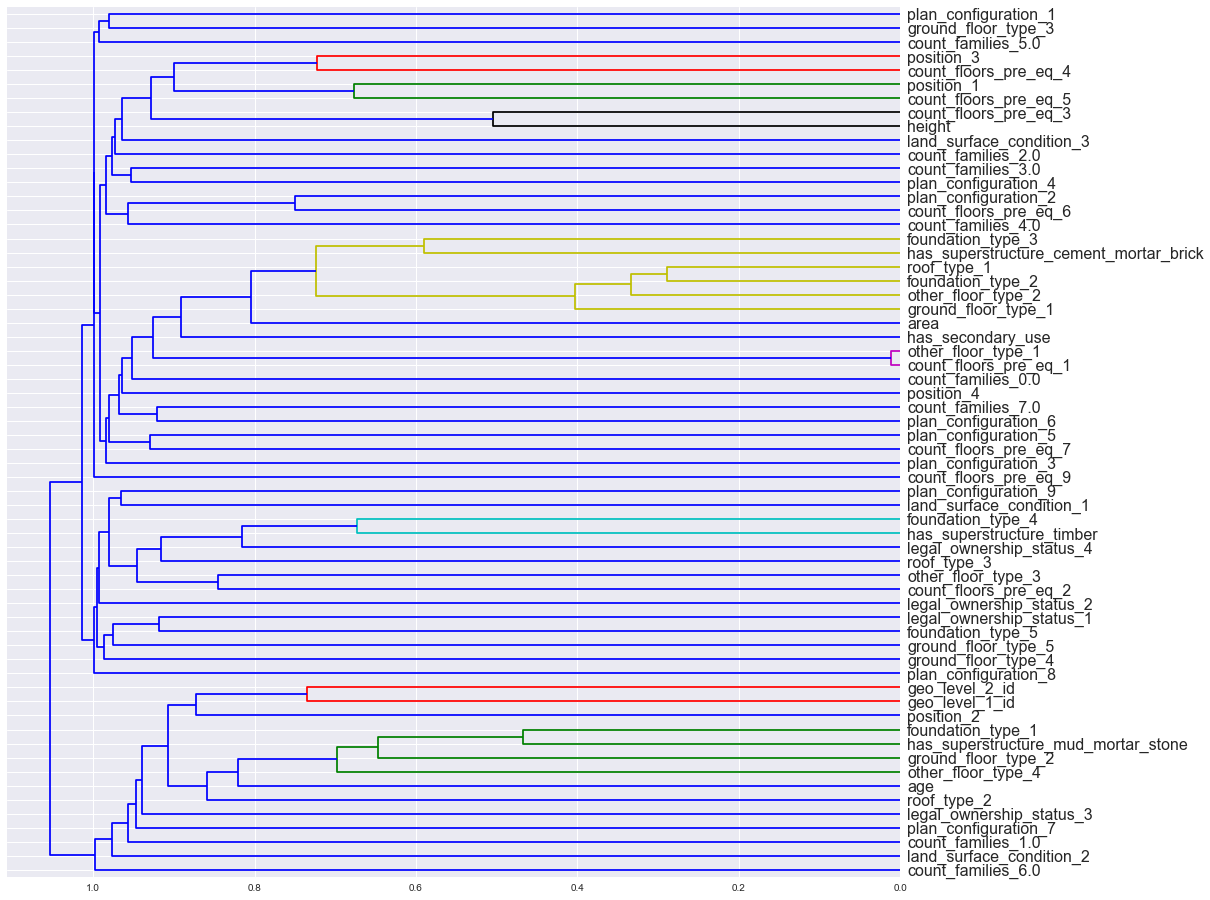

In [33]:
from scipy.cluster import hierarchy as hc

corr = np.round(sp.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,16))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

In [34]:
m = rfc_m
#x_all = X.join( y_df['damage_grade'])
#dam = y_df['damage_grade'].values.tolist()
feats = [ 'age', 'geo_level_2_id' ]

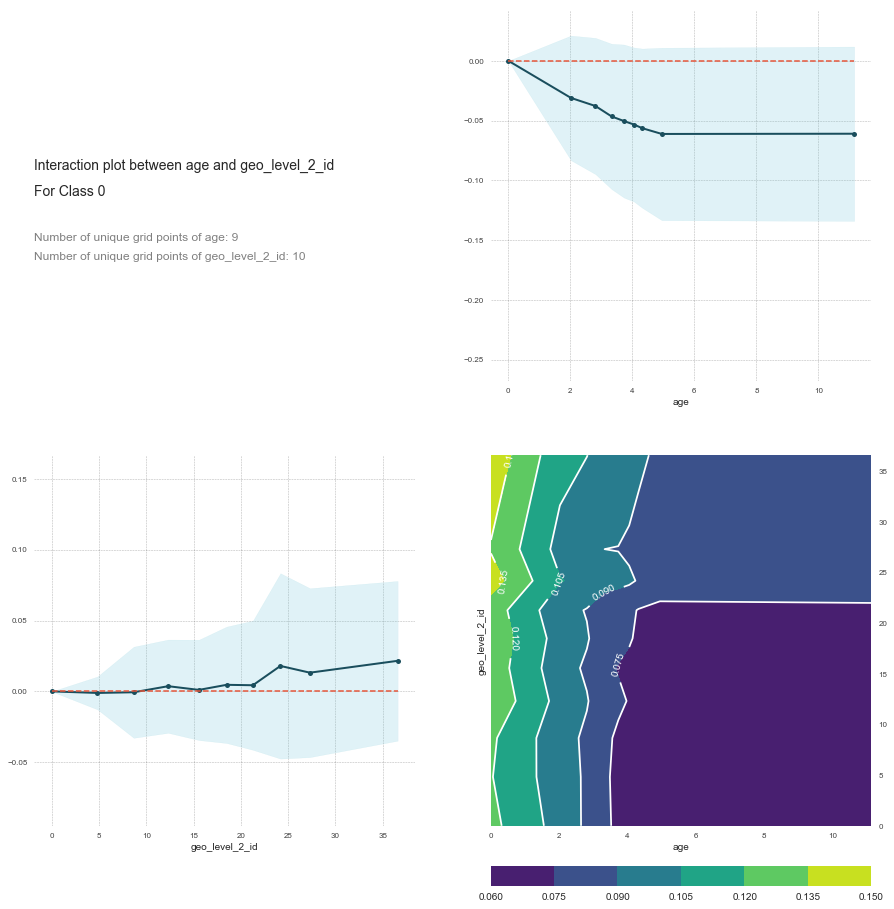

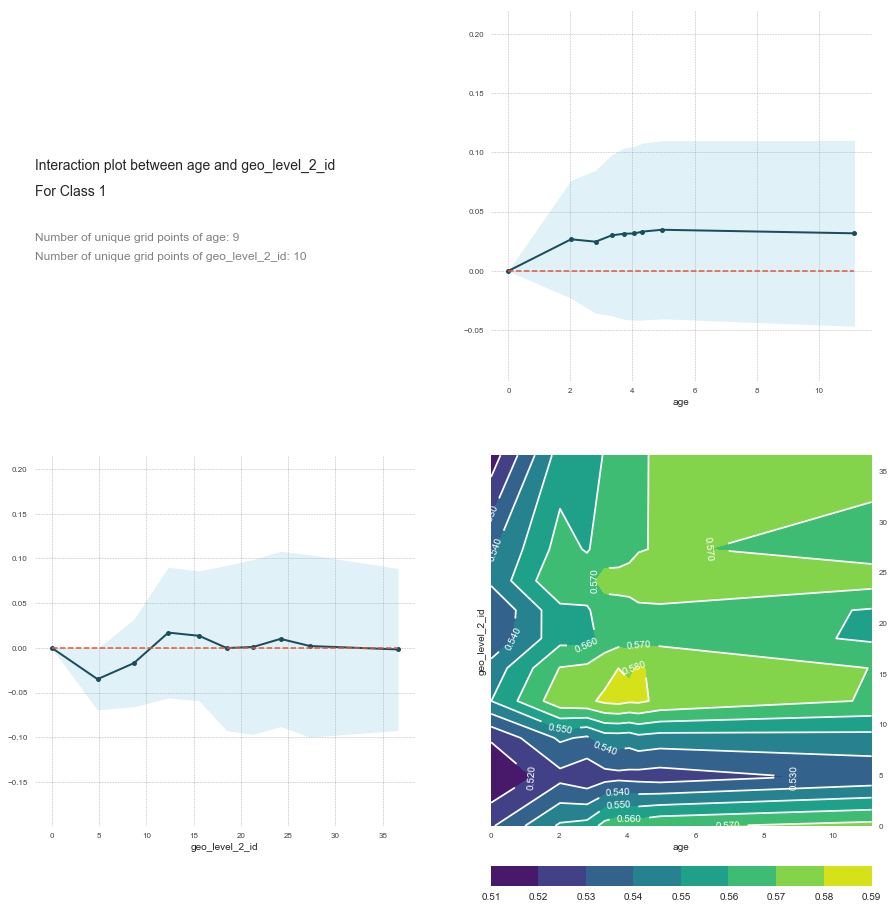

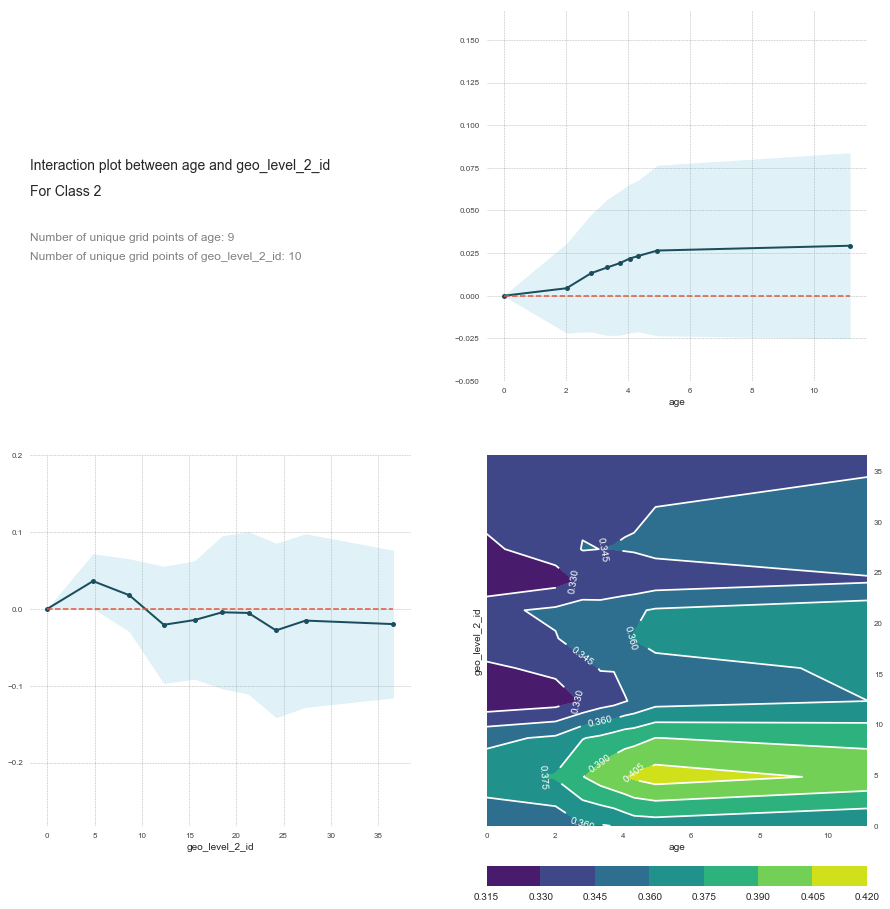

In [35]:
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

In [36]:
from scipy.stats import skew

numeric_dtypes = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_X = X[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_X})

In [37]:
skews.head()

skew
plan_configuration_8   99.984999
count_families_7.0     99.984999
count_floors_pre_eq_7  99.984999
count_floors_pre_eq_9  99.984999
plan_configuration_1   70.689463

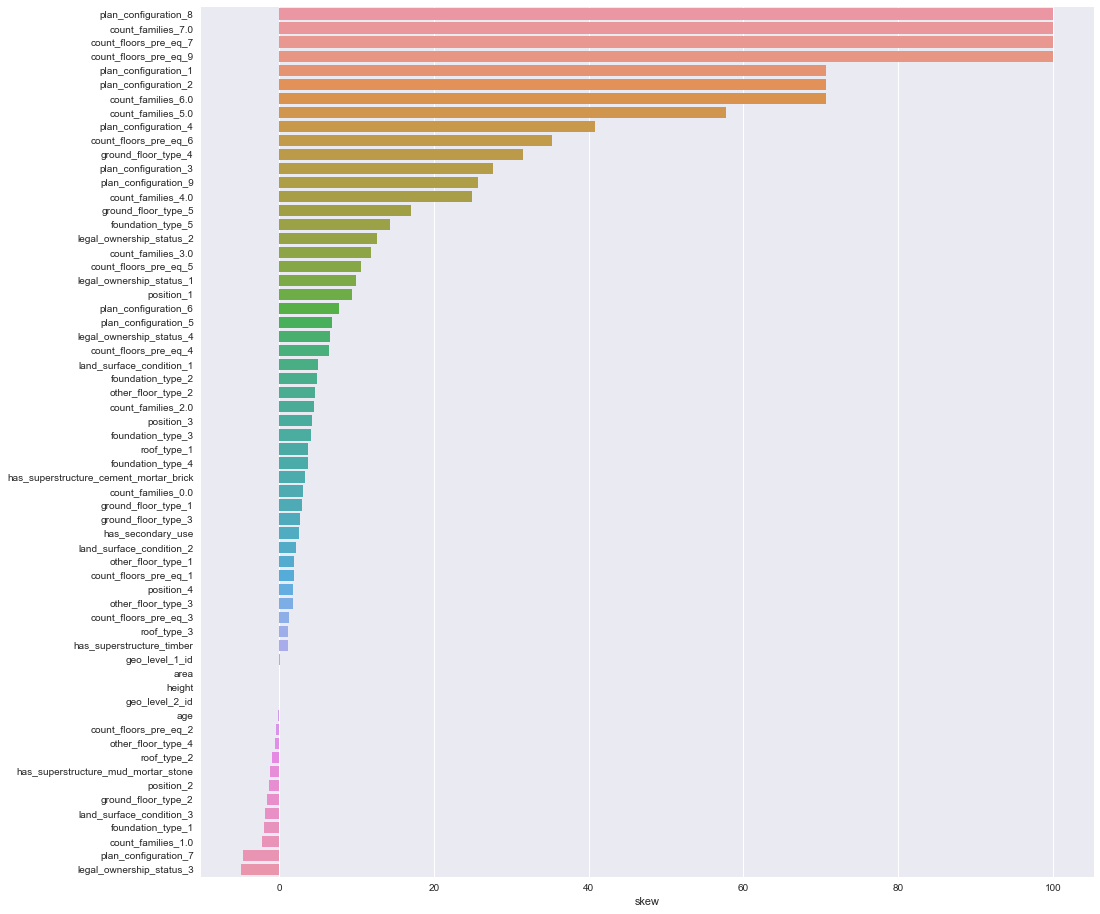

In [38]:
fig = plt.figure(figsize=(16,16))
sns.barplot(x = skews['skew'], y = skews.index )

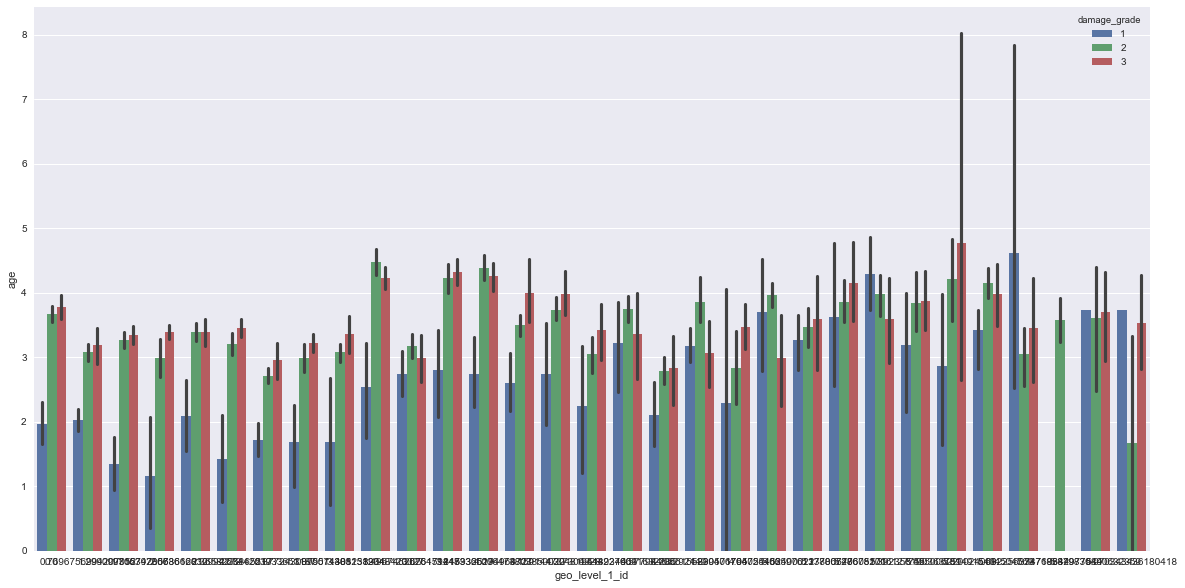

In [39]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x = X['geo_level_1_id'], y = X['age'],hue = y_df.damage_grade )

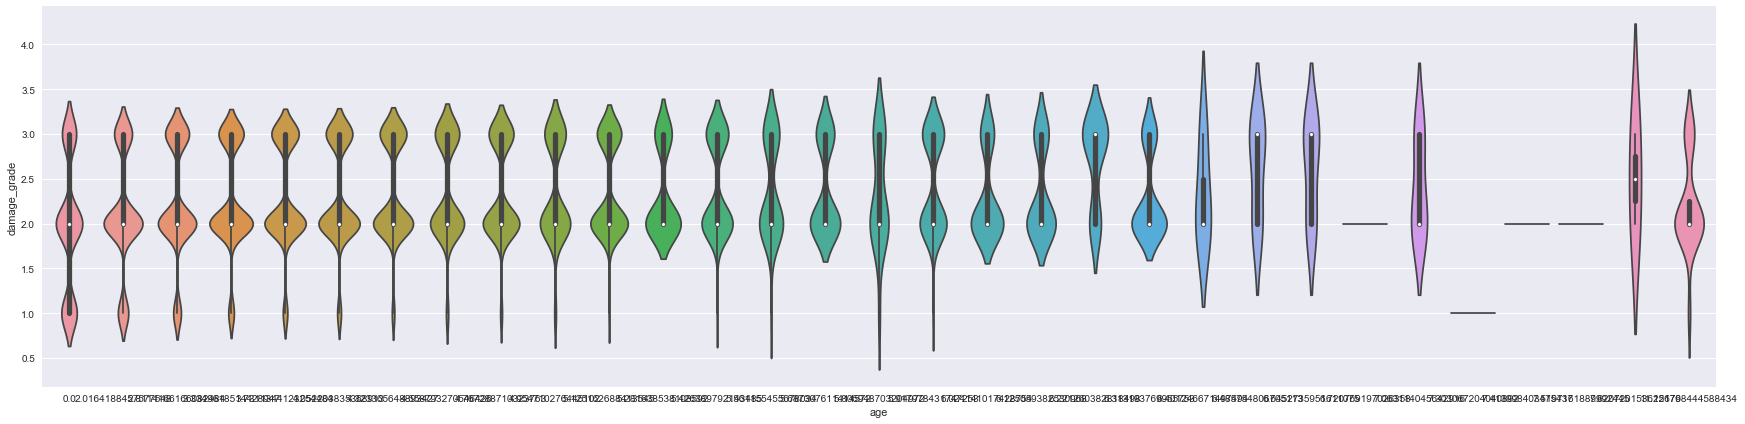

In [40]:
plt.figure(figsize=(30,7))
sns.violinplot(x= X['age'], y = y_df.damage_grade)